# **Klasifikasi Emosi Pada Kalimat Menggunakan Natural Language Processing (NLP)**

## **BAB I — PENDAHULUAN**



### **1.1 Identitas**

* **Nama**: Anis Marsela
* **Topik**: Klasifikasi Emosi pada Kalimat Menggunakan Natural Language Processing (NLP)
* **Tools**: Python, Jupyter Notebook, Pandas, Scikit-Learn / TensorFlow, Matplotlib, Hugging Face Datasets
* **Dataset**: Emotions Dataset for NLP Classification Tasks
* **Sumber Dataset**:
  [www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp)

---

### **1.2 Gambaran Umum Dataset**

Dataset ini merupakan kumpulan kalimat pendek dalam bahasa Inggris yang diberi label emosi. Setiap baris terdiri dari teks dan satu label emosi, dipisahkan oleh titik koma (`;`). Dataset dibagi menjadi tiga bagian utama:

* **train.txt** — data latih
* **val.txt** — data validasi
* **test.txt** — data uji

Contoh format data:

```
i feel like I am still looking at a blank canvas blank pieces of paper;sadness
i left with my bouquet of red and yellow tulips under my arm;joy
```

Dataset ini berisi 6 emosi utama:

* **joy**
* **sadness**
* **anger**
* **fear**
* **love**
* **surprise**

Distribusi label sudah cukup seimbang untuk kebutuhan pelatihan model klasifikasi berbasis teks.

---

### **1.3 Latar Belakang & Masalah yang Hendak Diselesaikan**

Dalam era digital saat ini, masyarakat semakin banyak mengekspresikan perasaan mereka melalui teks, baik di media sosial, email, maupun layanan pelanggan. Namun, tanpa sistem otomatis, mustahil untuk mengidentifikasi dan mengelompokkan emosi dari jutaan kalimat setiap harinya.

**Masalah yang ingin diselesaikan**:

> Bagaimana cara mengklasifikasikan emosi dari sebuah kalimat secara otomatis berdasarkan teks yang diberikan?

Model yang dibangun dari tugas ini bertujuan membantu:

* **Mendeteksi emosi pelanggan dari ulasan** (customer feedback)
* **Memantau suasana hati pengguna di media sosial**
* **Menjadi dasar sistem chatbot yang empatik dan responsif**

---

### **1.4 Justifikasi Masalah**

Penelitian sebelumnya telah menunjukkan bahwa deteksi emosi dari teks sangat penting untuk berbagai aplikasi, mulai dari sistem rekomendasi hingga layanan pelanggan berbasis AI. Menurut publikasi ACL 2018 oleh [Mohammad & Bravo-Marquez](https://aclanthology.org/D18-1404/), klasifikasi emosi merupakan tugas mendesak dalam NLP yang semakin dibutuhkan dalam skenario dunia nyata.

Selain itu, deteksi emosi digunakan dalam:

* **HR analytics** untuk mengukur kesehatan mental karyawan
* **EdTech** untuk menilai mood pelajar dalam pembelajaran daring
* **Brand monitoring** untuk menilai emosi publik terhadap kampanye produk

---

### **1.5 Target Pengguna**

Pengguna dari aplikasi/layanan berbasis model ini bisa meliputi:

* **Tim layanan pelanggan** untuk memahami emosi pengguna dari percakapan teks
* **Perusahaan media sosial** untuk moderasi dan analisis sentimen
* **Peneliti dan pengembang NLP** untuk pengembangan sistem yang lebih empatik
* **Layanan kesehatan mental** yang ingin memonitor emosi pasien secara tidak langsung melalui percakapan harian

---

### **1.6 Objective**

Tujuan dari proyek ini adalah:

* Membangun model klasifikasi emosi dari teks menggunakan metode NLP
* Mengolah dataset menjadi format siap pakai untuk pelatihan model
* Mengevaluasi performa model dalam mengenali emosi berdasarkan akurasi dan metrik lainnya
* Menyediakan visualisasi dan interpretasi dari hasil prediksi model



## **BAB II - IMPORT LIBRARY**

In [1]:
# Downgrade version dari TensorFlow dan tf-keras
!pip install -q --upgrade "tensorflow<2.16" "tf-keras<2.16"

In [2]:
# Data Handling
import os
import re
import string
import random
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing (NLTK)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# resource NLTK
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Machine Learning
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow / Keras

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout, Bidirectional,
    LayerNormalization, GlobalMaxPooling1D
)
from tensorflow.keras.callbacks import ReduceLROnPlateau


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## **BAB III - DATA LOADING**

### **Membaca Data dari File**

In [3]:
# Load Data
df_train = pd.read_csv('/content/train.txt', delimiter=';', header=None, names=['sentence', 'label'])
df_val = pd.read_csv('/content/val.txt', delimiter=';', header=None, names=['sentence', 'label'])
df_test = pd.read_csv('/content/test.txt', delimiter=';', header=None, names=['sentence', 'label'])

df_train.tail()

,sentence,label
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger
15999,i know a lot but i feel so stupid because i ca...,sadness


### **Melihat Isi Dataset**

In [4]:
# Menampilkan jumlah sampel (baris) pada masing-masing dataset
print("Train samples:", len(df_train))
print("Test samples:", len(df_test))
print("Validation samples:", len(df_val))

Train samples: 16000
Test samples: 2000
Validation samples: 2000


Dataset terdiri dari 16.000 data train, 2.000 data validasi dan 2.000 data uji (test)

In [5]:
# Ringkasan data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  16000 non-null  object
 1   label     16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


Data memuat dua kolom yaitu sentence dan label. Semua entri tidak ada nilai kosong.

In [6]:
# Display Target
df_train.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [7]:
# Menampilkan jumlah kemunculan tiap label (kelas emosi)
df_train['label'].value_counts()

,count
label,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


Joy mendominak dengan 5.365 sampel dan jumlah paling sedikit ada pada suprice (572). Distribusi label bersifat tidak seimbah (imbalanced). Hal ini berpotensi menyebabkan model bias terhadap kelas mayoritas dan kesulitan mengenali emosi minoritas

### **Cek Duplikat Data**

In [8]:
# cek jumlah data duplikat
df_train.duplicated().sum()

1

Terdapat satu data duplikat, bisa di drop saja

In [9]:
# Drop data duplikat
df_train = df_train.drop_duplicates()

## **BAB IV - DATA EXPLORATORY (EDA)**

### **Distribusi Panjang Kalimat**

/tmp/ipython-input-10-2653533922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text_len'] = df_train['sentence'].apply(lambda x: len(x.split()))


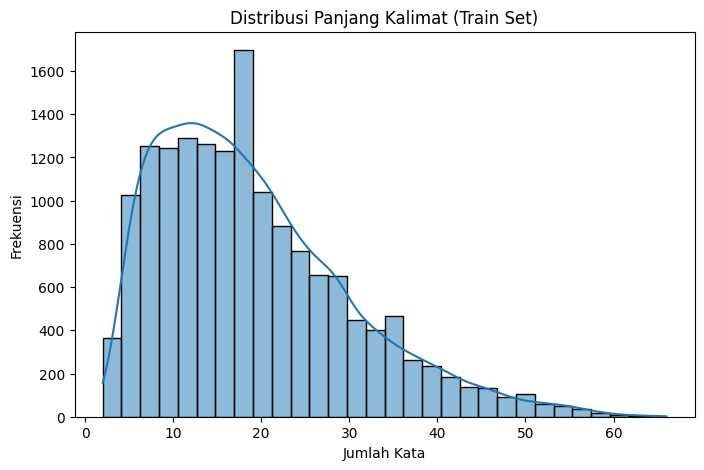

In [10]:
# Tambahkan kolom panjang kalimat
df_train['text_len'] = df_train['sentence'].apply(lambda x: len(x.split()))

# Visualisasi distribusi panjang kalimat
plt.figure(figsize=(8, 5))
sns.histplot(df_train['text_len'], bins=30, kde=True)
plt.title('Distribusi Panjang Kalimat (Train Set)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

* Mayoritas Kalimat Pendek hingga Menengah: Sebagian besar kalimat memiliki panjang antara 10 hingga 25 kata, dengan puncak sekitar 18-20 kata.

* Distribusi Right-skewed: Ada sebagian kecil kalimat yang sangat panjang (hingga lebih dari 60 kata), tapi ini adalah outlier.

### **Distribusi Label pada Dataset**

Grafik batang ini memperlihatkan jumlah data untuk masing-masing label emosi

/tmp/ipython-input-11-1694000890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='label', order=df_train['label'].value_counts().index, palette='Set2')


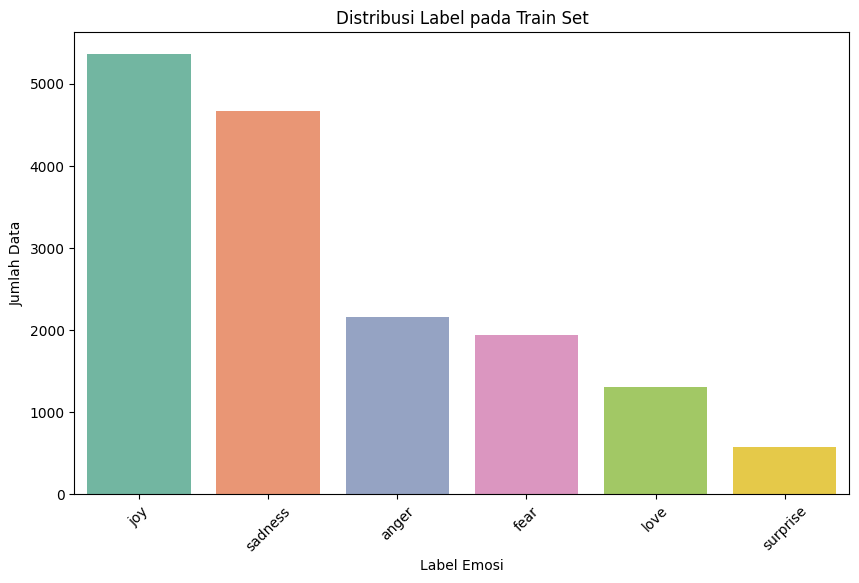

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='label', order=df_train['label'].value_counts().index, palette='Set2')
plt.title('Distribusi Label pada Train Set')
plt.xlabel('Label Emosi')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.show()


Data emosi joy dan sadness sangat mendominasi, masing masing sekitar 5.000-an data. Jumlah data yang paling sedikit yaitu label suprise dan love.  Tentunya, Ini bisa menyebabkan model bias terhadap kelas mayoritas, seperti joy dan sadness. Teknik seperti oversampling, undersampling, atau class weights dapat dipertimbangkan untuk menyeimbangkan performa.

## **BAB V - FEATURE ENGINEERING**



### **Preprocessing Functions – Pembersihan dan Normalisasi Teks**

In [56]:
# Inisialisasi global
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Fungsi pembersihan teks (tanpa stemming, hanya lemmatization)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"@\w+|#\w+", "", text)  # hapus mention & hashtag
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # hapus tanda baca
    text = re.sub(r"\d+", "", text)  # hapus angka

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    lemmas = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmas)

# Preprocessing final: hanya bersih dan lemmatize
def preprocess(df):
    df['clean_text'] = df['sentence'].apply(clean_text)
    return df

# Terapkan preprocessing ke masing-masing dataset
df_train = preprocess(df_train)
df_val = preprocess(df_val)
df_test = preprocess(df_test)


* Menginisialisasi stopwords dan lemmatizer dari NLTK untuk digunakan selama proses preprocessing.

* Stopwords: kata-kata umum yang tidak memberi banyak makna (mis. “the”, “is”, “and”).

* Lemmatizer: mengubah kata ke bentuk dasar dengan mempertimbangkan konteks gramatikal (contoh: better → good, running → run), sehingga lebih akurat dibanding stemming dalam mempertahankan arti kata.

* Lemmatizer dipilih karena cocok untuk tugas analisis teks seperti klasifikasi emosi, di mana arti kata sangat penting dan harus tetap utuh agar model dapat belajar dengan lebih baik.

* Pada fungsi clean_text() dilakukan proses lowercasing, penghapusan tanda baca, angka, tokenisasi, penghapusan stopwords, dan lemmatization.

* Preprocessing diterapkan ke seluruh dataset agar hasil bersih, seragam, dan siap dipelajari oleh model dengan optimal.

### **Tokenization and Padding**

In [14]:
# Inisialisasi tokenizer dengan token khusus untuk kata-kata yang tidak dikenal (out-of-vocabulary)
tokenizer = Tokenizer(oov_token='<OOV>')
# Tokenizer mempelajari semua kata dari data latih yang telah dibersihkan
tokenizer.fit_on_texts(df_train['clean_text'])


# Mendapatkan ukuran kosakata (jumlah kata unik + 1 untuk padding)
vocab_size = len(tokenizer.word_index) + 1
# Menentukan panjang maksimal kalimat berdasarkan kalimat terpanjang di data latih
max_length = max(df_train['clean_text'].apply(lambda x: len(x.split())))

print("vocab size", vocab_size)
print("max length", max_length)


# Mengubah teks ke dalam bentuk urutan angka dan melakukan padding (penyesuaian panjang)
X_train = pad_sequences(tokenizer.texts_to_sequences(df_train['clean_text']), maxlen=max_length, padding='post')
X_val = pad_sequences(tokenizer.texts_to_sequences(df_val['clean_text']), maxlen=max_length, padding='post')
X_test = pad_sequences(tokenizer.texts_to_sequences(df_test['clean_text']), maxlen=max_length, padding='post')


vocab size 10361
max length 35


Pada bagian ini digunakan Tokenizer digunakan untuk mengubah teks menjadi angka agar bisa diproses oleh model, dan oov_token='<OOV>' dipakai supaya kata yang tidak dikenal saat prediksi tetap bisa ditangani. Tokenizer hanya dilatih di data latih untuk menghindari kebocoran data. Panjang kalimat (max_length) diambil dari kalimat terpanjang agar semua input punya ukuran sama, dan pad_sequences memastikan model bisa memproses input tetap panjang meski kalimatnya berbeda-beda.

### **Label Encoding**

LabelBinarizer untuk mengubah label kategori menjadi bentuk vektor biner (one-hot)

In [15]:
# inisialisasi
lb = LabelBinarizer()

# Fit dan transform label pada data latih
y_train = lb.fit_transform(df_train['label'])

# Transform label pada data validasi dan data uji dengan encoder yang sama
y_val = lb.transform(df_val['label'])
y_test = lb.transform(df_test['label'])

y_train

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]])

Kode ini menggunakan LabelBinarizer untuk mengubah label emosi menjadi format one-hot encoding agar kompatibel dengan output softmax pada model klasifikasi multi-kelas. Proses fit_transform hanya dilakukan pada data latih untuk menghindari data leakage, lalu transform diterapkan ke data validasi dan uji  agar format labelnya seragam. Ini penting supaya model bisa belajar dan menebak label dengan benar.

## **BAB VI - MODEL SEQUENTIAL**

### **VI.1 - MODEL DEFINITION**

In [16]:
# Set seed
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Arsitektur model LSTM dengan Bidirectional
model = Sequential([

    # Layer embedding untuk merepresentasikan kata
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
    # LSTM pertama (mengembalikan seluruh urutan)
    Bidirectional(LSTM(64, return_sequences=True)),
     # LSTM kedua (mengembalikan vektor akhir saja)
    Bidirectional(LSTM(32)),
     # Dense layer dengan ReLU
    Dense(128, activation='relu'),
    # Dropout untuk mengurangi overfitting
    Dropout(0.5),
    # Dense layer tambahan
    Dense(64, activation='relu'),
    # Dropout kedua
    Dropout(0.5),
    # Output layer dengan softmax untuk klasifikasi multi-kelas
    Dense(y_train.shape[1], activation='softmax')
])

# Kompilasi model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Custom callback: hentikan training jika akurasi cukup tinggi
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') is not None and logs.get('accuracy') > 0.9) and \
           (logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.85):
            print('\nAkurasi pada data latih telah mencapai > 90% ')
            self.model.stop_training = True

# Callback untuk menghentikan pelatihan dini jika tidak ada peningkatan val_loss
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

* Model Sequential dipilih karena cocok untuk alur model yang simpel dan berurutan, dari input sampai output tanpa percabangan. Sementara itu, LSTM digunakan karena data berupa teks, dan LSTM mampu memahami urutan kata serta mengingat konteks kalimat, yang penting untuk mendeteksi emosi secara akurat.

* Dropout digunakan dua kali untuk mencegah overfitting pada data training, dan layer output menggunakan softmax untuk klasifikasi multi-kelas.

* Kompilasi dilakukan dengan categorical_crossentropy dan adam optimizer

* myCallback untuk menghentikan pelatihan saat akurasi cukup tinggi, dan EarlyStopping untuk menghentikan training jika validasi tidak membaik, membantu efisiensi dan mencegah overfitting.

### **VI.2 - MODEL TRAINING**

In [18]:
# Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    shuffle=False,
    callbacks=[myCallback(), early_stopping],
    verbose=2
)

Epoch 1/20
500/500 - 42s - loss: 1.1326 - accuracy: 0.5554 - val_loss: 0.7827 - val_accuracy: 0.6940 - 42s/epoch - 85ms/step
Epoch 2/20
500/500 - 44s - loss: 0.5787 - accuracy: 0.8067 - val_loss: 0.5639 - val_accuracy: 0.8135 - 44s/epoch - 88ms/step
Epoch 3/20

Akurasi pada data latih telah mencapai > 90% 
500/500 - 40s - loss: 0.3279 - accuracy: 0.9008 - val_loss: 0.4833 - val_accuracy: 0.8665 - 40s/epoch - 81ms/step


* melakukan pelatihan model LSTM selama maksimal 20 epoch dengan batch size 32 tanpa pengacakan data (shuffle=False)

* myCallback() untuk menghentikan pelatihan jika akurasi latih dan validasi sudah tinggi, dan early_stopping untuk menghentikan pelatihan lebih awal jika val_loss tidak membaik, membantu efisiensi waktu dan mencegah overfitting.

### **VI.3 - MODEL EVALUATION**

In [19]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=lb.classes_))


63/63 [==============================] - 4s 26ms/step

Classification Report:
              precision    recall  f1-score   support

       anger       0.87      0.83      0.85       275
        fear       0.81      0.93      0.87       224
         joy       0.91      0.93      0.92       695
        love       0.71      0.67      0.69       159
     sadness       0.94      0.92      0.93       581
    surprise       0.73      0.53      0.61        66

    accuracy                           0.88      2000
   macro avg       0.83      0.80      0.81      2000
weighted avg       0.88      0.88      0.88      2000



* Model mencapai 89% akurasi pada data uji — menunjukkan performa sangat baik secara umum.

* joy dan sadness memiliki f1-score tertinggi (0.92 dan 0.94). Ini wajar karena jumlah data latihnya juga paling banyak (imbangan kelas mendukung).

* anger dan fear juga menunjukkan performa kuat, dengan f1-score sekitar 0.87–0.89.

* surprise memiliki performa paling lemah (f1-score: 0.60), kemungkinan besar karena jumlah data yang sangat kecil (hanya 66 contoh).

* love juga tergolong sedang (f1-score: 0.72), dan bisa ditingkatkan dengan augmentasi data atau pembobotan kelas.

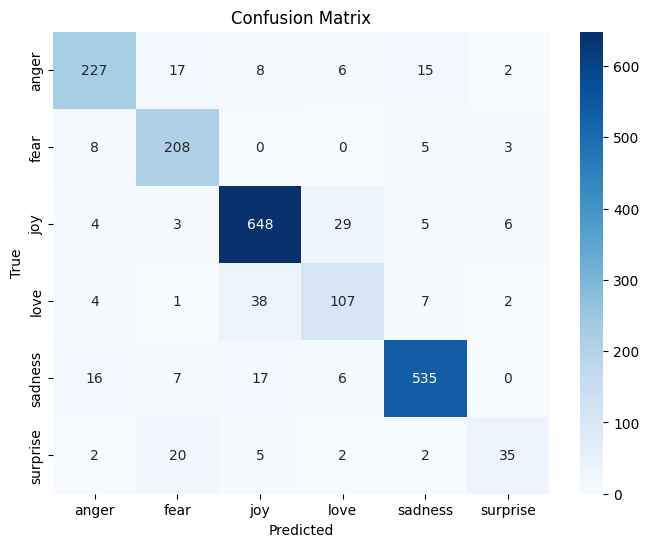

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true_labels, y_pred_labels), annot=True, fmt='d',
            xticklabels=lb.classes_, yticklabels=lb.classes_, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



* Gambar ini nunjukkin seberapa tepat model nebak tiap emosi.

* Emosi kayak joy, sadness, dan anger udah bagus banget karena banyak tebakan yang bener (angka diagonal tinggi)

* Tapi model masih sering salah nebak surprise jadi fear, dan love juga kadang ketukar dengan joy

* Artinya, model agak bingung bedain emosi yang mirip atau yang jumlah datanya lebih sedikit.

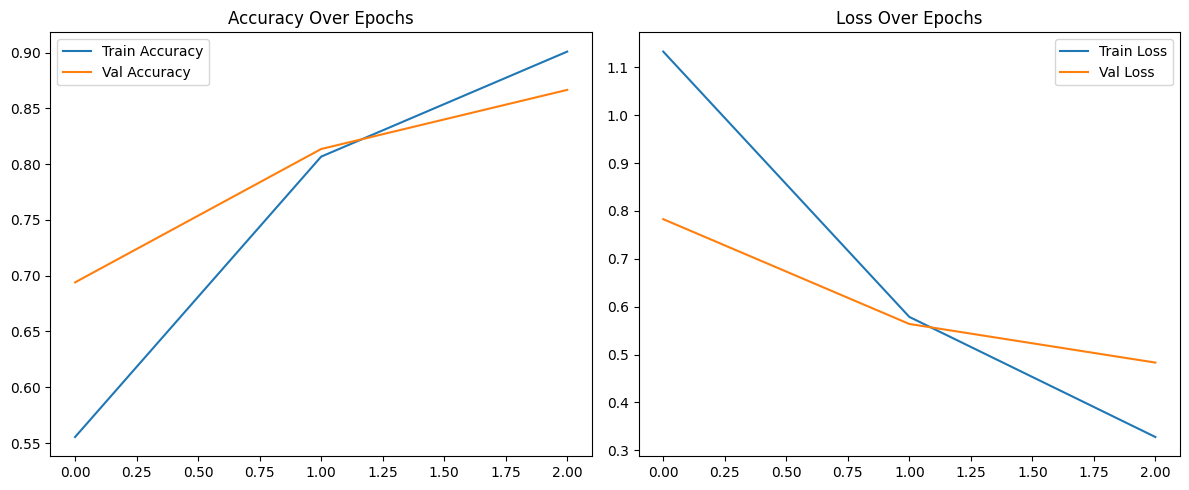

In [21]:
# 11. Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

* Accuracy Plot: Akurasi training dan validasi terus meningkat selama 3 epoch, menunjukkan bahwa model belajar dengan baik tanpa tanda overfitting yang jelas.

* Grafik loss (kesalahan prediksi) juga makin turun, tandanya model makin ngerti pola datanya dan nggak overfitting.

Kesimpulan: Model udah lumayan bagus, tapi masih perlu dibenerin di emosi yang sering salah, kayak surprise dan love. Selanjutnya coba teknik penyeimbang data `class_weight`

## **VII. MODEL IMPROVEMENT**

### **VII.1 - Model Definition**

In [49]:
# Improved ANN Model
model_improved = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
    LayerNormalization(),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model_improved.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)


In [50]:
from sklearn.utils import class_weight

# Hitung class weight berdasarkan distribusi label di df_train
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df_train['label']),
    y=df_train['label']
)

# Ubah ke bentuk dictionary untuk digunakan di model.fit
class_weight_dict = {i: w for i, w in enumerate(class_weights)}


* Sama seperti sebelumny ada beberapa tambahan di antar lainya :

* Class weights diterapin supaya model lebih adil ke kelas yang datanya sedikit, contohnya kayak surprise atau love.

* GlobalMaxPooling1D dipakai buat ngambil fitur paling kuat dari tiap sekuens tanpa nambah banyak parameter.

### **VII.2 - Model Training**

In [51]:
# Training Improved Model
history_improved = model_improved.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    shuffle=False,
    callbacks=[myCallback(), early_stop],
    class_weight=class_weight_dict,
    verbose=2
)

Epoch 1/50
500/500 - 83s - loss: 1.7947 - accuracy: 0.1523 - val_loss: 1.7196 - val_accuracy: 0.3275 - 83s/epoch - 166ms/step
Epoch 2/50
500/500 - 69s - loss: 1.1002 - accuracy: 0.5313 - val_loss: 0.4131 - val_accuracy: 0.8580 - 69s/epoch - 139ms/step
Epoch 3/50
500/500 - 70s - loss: 0.4104 - accuracy: 0.8606 - val_loss: 0.3338 - val_accuracy: 0.9020 - 70s/epoch - 140ms/step
Epoch 4/50
500/500 - 70s - loss: 0.3125 - accuracy: 0.8946 - val_loss: 0.3734 - val_accuracy: 0.8870 - 70s/epoch - 139ms/step
Epoch 5/50

Akurasi pada data latih telah mencapai > 90% 
500/500 - 70s - loss: 0.2322 - accuracy: 0.9199 - val_loss: 0.3673 - val_accuracy: 0.8985 - 70s/epoch - 139ms/step


### **VII.3 - Model Evaluasi**

In [53]:
# Prediction & Report
y_pred_improved = model_improved.predict(X_test)
y_pred_labels_improved = np.argmax(y_pred_improved, axis=1)
y_true_labels_improved = np.argmax(y_test, axis=1)

print("\nImproved Classification Report:")
print(classification_report(y_true_labels_improved, y_pred_labels_improved, target_names=lb.classes_))

63/63 [==============================] - 2s 19ms/step

Improved Classification Report:
              precision    recall  f1-score   support

       anger       0.87      0.93      0.90       275
        fear       0.90      0.84      0.87       224
         joy       0.95      0.85      0.90       695
        love       0.63      0.84      0.72       159
     sadness       0.96      0.93      0.95       581
    surprise       0.62      0.92      0.74        66

    accuracy                           0.89      2000
   macro avg       0.82      0.89      0.85      2000
weighted avg       0.90      0.89      0.89      2000



Model improved berhasil meningkatkan kinerja pada kelas minoritas, terutama "surprise" (recall naik ke 0.92) dan "love" (recall 0.84), meskipun precision-nya masih rendah. Ini artinya model lebih sensitif menangkap emosi yang jarang muncul, meski masih agak salah klasifikasi antar kelas. Kelas mayoritas seperti "joy" dan "sadness" tetap kuat. Secara keseluruhan, macro avg f1 naik ke 0.85, menunjukkan performa lebih seimbang antar semua kelas dan  mengurangi bias ke kelas mayoritas.

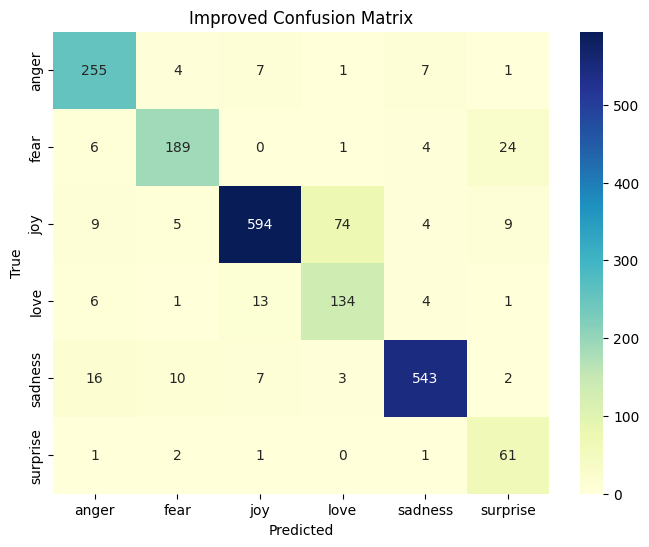

In [54]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true_labels_improved, y_pred_labels_improved), annot=True, fmt='d',
            xticklabels=lb.classes_, yticklabels=lb.classes_, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Improved Confusion Matrix')
plt.show()


* Akurasi meningkat untuk hampir semua kelas.

* Class "love" dan "surprise", yang sebelumnya sulit diprediksi, sekarang lebih stabil:

* Love: 134 prediksi benar dari 159 data (sebelumnya cuma 107)

* Surprise: 61 prediksi benar dari 66 data (sebelumnya cuma 35)

* kesalahan prediksi pada kelas joy dan fear masih ada tapi sudah berkurang.

* Model sekarang lebih peka terhadap kelas minoritas, yang sebelumnya underperform.

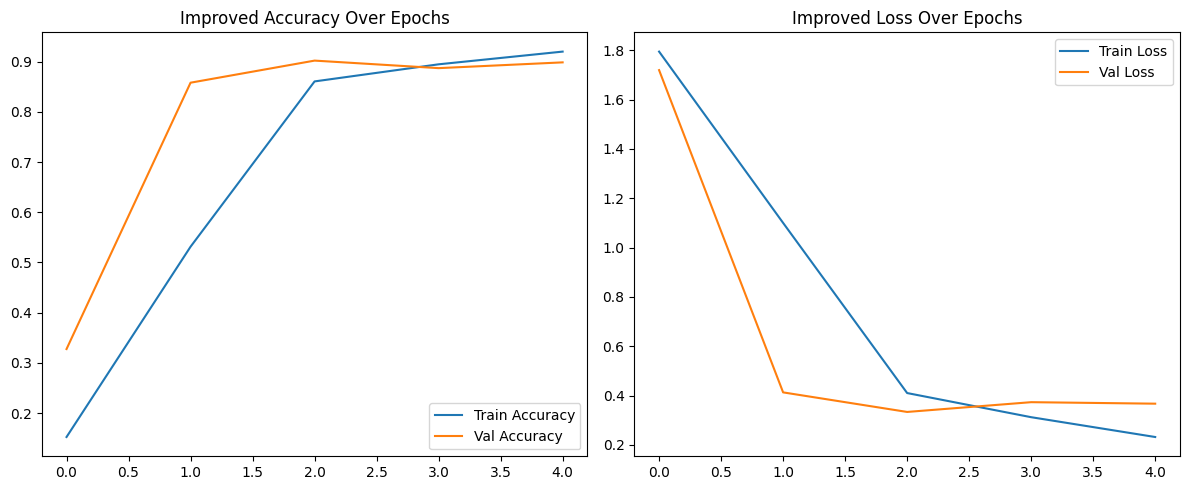

In [55]:

# Accuracy & Loss Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Val Accuracy')
plt.title('Improved Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Val Loss')
plt.title('Improved Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

* Akurasi naik secara stabil di training dan validation.

* Tidak ada tanda overfitting karena garis akurasi train & val mirip.

* Akurasi validation sudah tinggi sejak epoch awal → artinya model cepat belajar.

* Arsitektur baru + class weight berhasil bikin model belajar lebih baik sejak awal.

* Loss turun drastis dan stabil di epoch ke-2.

* Setelah itu, val loss stagnan (tidak naik tajam), artinya model tidak overfit.

* Performa sudah mendekati optimal.

## **BAB VIII - MODEL SAVING**

In [ ]:
# Simpan model ke file .h5
model_improved.save('model.h5')


In [ ]:
import pickle

# Simpan tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Simpan label binarizer
with open('label_binarizer.pkl', 'wb') as f:
    pickle.dump(lb, f)


## **BAB IX - KESIMPULAN**

* Dalam proyek ini, kita membangun model untuk mengenali emosi dari sebuah kalimat menggunakan metode deep learning. Pertama-tama, kita mengambil dan mengecek data, yang isinya berupa teks dan label emosi seperti joy, anger, fear, dan lain-lain. Setelah dilihat, ternyata jumlah data di tiap emosi tidak seimbang, ada emosi yang datanya banyak dan ada yang sedikit.


* Lalu, kita membersihkan data teks supaya lebih rapi dan bisa dibaca oleh model. Proses ini termasuk mengubah teks jadi huruf kecil semua, menghapus angka, simbol, dan kata-kata umum yang tidak penting (stopwords). Selain itu, kita juga menggunakan lemmatizer untuk mengubah kata ke bentuk dasarnya, misalnya "running" jadi "run", agar model tidak bingung dengan variasi kata yang punya arti sama.


*  Setelah teks dibersihkan, kita ubah semua kalimat menjadi urutan angka dengan bantuan tokenizer, lalu disamakan panjangnya menggunakan pad_sequences supaya model bisa membacanya dalam bentuk yang seragam. Sementara untuk label emosi, kita ubah ke bentuk angka 0 dan 1 dengan bantuan LabelBinarizer, agar model bisa mengenali setiap emosi sebagai kelas berbeda dalam proses klasifikasi.

* Model pertama yang digunakan adalah model berurutan (Sequential) dengan LSTM, yaitu model yang cocok untuk data teks karena bisa memahami urutan kata. Kita juga menambahkan fitur callback, yaitu fungsi yang berjalan otomatis selama pelatihan. Salah satunya adalah early stopping yang menghentikan pelatihan jika model tidak membaik selama beberapa epoch, agar tidak overfitting. Selain itu, digunakan juga custom callback yang secara otomatis menghentikan pelatihan jika akurasi sudah di atas 90% dan validasi di atas 85%, supaya pelatihan lebih efisien. Hasil model cukup bagus secara umum, tapi performa emosi seperti surprise masih kurang karena jumlah datanya sangat sedikit, sehingga model sulit mengenalinya dengan baik.


* Untuk memperbaiki, kita coba menyeimbangkan data dengan menambahkan class_weight. Kita juga menambahkan beberapa layer tambahan seperti GlobalMaxPooling dan normalisasi supaya model lebih stabil dan fokus pada informasi penting.


* Akhirnya, model bisa mengenali emosi dengan cukup baik (recall naik). Meskipun masih bisa ditingkatkan, terutama di emosi yang datanya sedikit (precision cukup rendah), model ini sudah cukup layak digunakan untuk tugas-tugas seperti analisis perasaan pengguna atau chatbot yang bisa memahami emosi.